0 0 20
0.05 1.0 19.51
0.1 1.9755000000000003 19.020000000000003
0.15000000000000002 2.9265000000000003 18.530000000000005
0.2 3.8530000000000006 18.040000000000006
0.25 4.755000000000001 17.550000000000008
0.3 5.632500000000001 17.06000000000001
0.35 6.485500000000002 16.57000000000001
0.39999999999999997 7.314000000000003 16.080000000000013
0.44999999999999996 8.118000000000004 15.590000000000012
0.49999999999999994 8.897500000000004 15.100000000000012
0.5499999999999999 9.652500000000005 14.610000000000012
0.6 10.383000000000006 14.120000000000012
0.65 11.089000000000008 13.630000000000011
0.7000000000000001 11.770500000000009 13.140000000000011
0.7500000000000001 12.427500000000009 12.650000000000011
0.8000000000000002 13.06000000000001 12.16000000000001
0.8500000000000002 13.66800000000001 11.67000000000001
0.9000000000000002 14.25150000000001 11.18000000000001
0.9500000000000003 14.810500000000012 10.69000000000001
1.0000000000000002 15.345000000000013 10.20000000000001
1.05000000

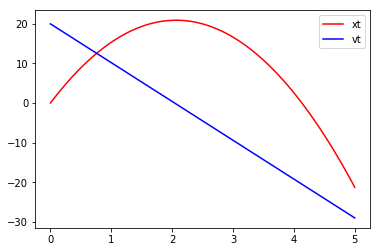

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

g = 9.8
v0 = 20
x0 = 0
gammat = 0.05

x_data = []
xt_data = []
vt_data = []
xt = x0
vt = v0
t = 0
while t <= 5:
    print(t, xt, vt)
    x_data.append(t)
    xt_data.append(xt)
    vt_data.append(vt)
    xpre = xt
    vpre = vt
    t += gammat
    
    xt = gammat * vpre + xpre
    vt = gammat * -g + vpre      

plt.plot(x_data, xt_data, "r", linestyle="-", label="xt")
plt.plot(x_data, vt_data, "b", linestyle="-", label="vt")
plt.legend()


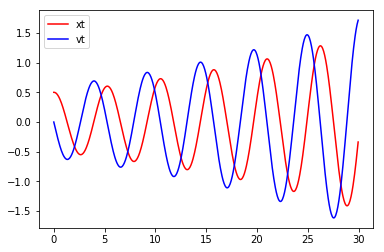

In [3]:
k = 2.88
m = 2
x0 = 0.5
v0 = 0
dt = 0.05
T = 30

x_data = []
xt_data = []
vt_data = []
    
t = 0
vt = v0
xt = x0
while t <= T:
#     print(t, xt, vt)
    x_data.append(t)
    xt_data.append(xt)
    vt_data.append(vt)
    xpre = xt
    vpre = vt    
    t += dt

    xt = dt * vpre  + xpre
    vt = dt * (-k / m) * xpre + vpre
 
plt.plot(x_data, xt_data, "r", linestyle="-", label="xt")
plt.plot(x_data, vt_data, "b", linestyle="-", label="vt")
plt.legend()


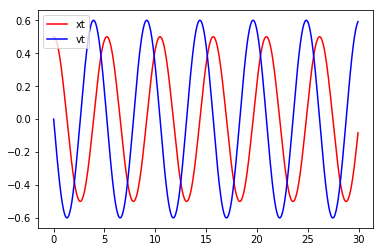

In [4]:
import numpy as np

x0 = 0.5
v0 = 0
k = 2.88
m = 2
delta = 0.05
T = 30
xt = x0
vt = v0
A = np.matrix([[0, 1],[-k/m, 0]])
X = np.matrix([[xt], [vt]])

x_data = []
xt_data = []
vt_data = []

for t in np.arange(0, T, delta):
  x_data.append(t)
  xt_data.append(float(X[0][0]))
  vt_data.append(float(X[1][0]))

  dx1 = A * X * delta
  dx2 = A * (X + dx1) * delta
  X = X + (dx1 + dx2) / 2

  
plt.plot(x_data, xt_data, "r", linestyle="-", label="xt")
plt.plot(x_data, vt_data, "b", linestyle="-", label="vt")
plt.legend()


In [5]:
##### 2 #####

In [8]:
d_lattice = 0.01
x_limit = 2
y_limit = 1
top_t = 1
lrb_t = -1
cycle = 50000
epsilon = 10 ** -12

x_range = int(x_limit / d_lattice)
y_range = int(y_limit / d_lattice)

def cell_init():
    cell = np.array([[0.0 for _ in range(x_range)]] * y_range)
    for y in range(len(cell)):
        for x in range(len(cell[0])):
            if y == 0:
                cell[y, x] = top_t
            elif y == len(cell) - 1 or x == 0 or x == len(cell[0]) - 1:
                cell[y, x] = lrb_t
                
                
    return cell

def gaus_zaidel(cell):
    count = 0
    while count < cycle:
        d_sum = 0
        pre_cell = cell.copy()
        for y in range(1, y_range - 1):
            for x in range(1, x_range - 1):
                pre_num = cell[y, x]
                cell[y, x] = (cell[y, x+1] + cell[y, x-1] + cell[y+1, x] +  cell[y-1, x]) / 4
#                 d_sum += (pre_num - cell[y, x]) ** 2

        d_sum = np.sum(pre_cell - cell) ** 2
        d_variance = d_sum / (x_range * y_range)
        if d_variance < epsilon:
            print(count)
            return cell

        count += 1

    return cell
def jacobi(cell):
    count = 0
    while count < cycle:
        d_sum = 0
        pre_cell = cell.copy()
        for y in range(1, y_range - 1):
            for x in range(1, x_range - 1):
                cell[y, x] = (pre_cell[y, x+1] + pre_cell[y, x-1] + pre_cell[y+1, x] +  pre_cell[y-1, x]) / 4
        
#         d_sum += (pre_cell[y, x] - cell[y, x]) ** 2
        d_sum = np.sum(pre_cell - cell) ** 2
        d_variance = d_sum / (x_range * y_range)
        if d_variance < epsilon:
            print(count)
            return cell

        count += 1   

    return cell

def temparture_plot(cell):
    y, x = np.mgrid[slice(0, y_limit + d_lattice, d_lattice), slice(0, x_limit + d_lattice, d_lattice)]
    plt.figure(figsize=(10,5))
    plt.xlim([0, x_limit])
    plt.ylim([y_limit, 0])
    plt.pcolor(x, y, cell, cmap='inferno')
    plt.colorbar()

cell = cell_init()
cell = gaus_zaidel(cell)

plt.subplot(3,1,1)
plt.plot(np.arange(0, y_limit, d_lattice), [cell[y, int(0.4 // d_lattice)] for y in range(len(cell))], label='x:0.4')
plt.legend()
plt.subplot(3,1,2)
plt.plot(np.arange(0, y_limit, d_lattice), [cell[y, int(1.0 // d_lattice)] for y in range(len(cell))], label='x:1.0')
plt.legend()
plt.subplot(3,1,3)
plt.plot(np.arange(0, y_limit, d_lattice), [cell[y, int(1.6 // d_lattice)] for y in range(len(cell))], label='x:1.6')
plt.legend()

temparture_plot(cell)

KeyboardInterrupt: 